In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import h5py
import time
import random

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

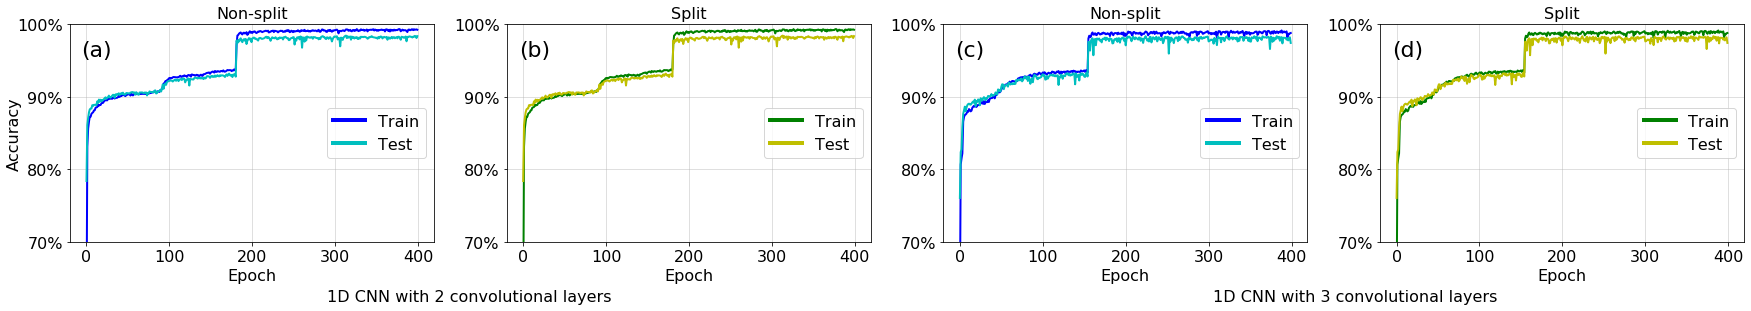

In [21]:
train_accs = []
test_accs = []
fname = ['2conv_nonsplit.csv', '2conv_split.csv', '3conv_nonsplit.csv', '3conv_split.csv']
titles = ['Non-split', 'Split', 'Non-split', 'Split']

for f in fname:
    df = pd.read_csv(os.path.join(root_path, 'csv', f))
    train_accs.append(df['acc'])
    test_accs.append(df['test_acc'])

fig, ax = plt.subplots(1, 4, figsize=(30, 4))
fig.text(0.13, 0.77, '(a)', size=22)
fig.text(0.333, 0.77, '(b)', size=22)
fig.text(0.535, 0.77, '(c)', size=22)
fig.text(0.737, 0.77, '(d)', size=22)
fig.text(0.31, -0.08, '1D CNN with 2 convolutional layers', ha='center', size=16)
fig.text(0.72, -0.08, '1D CNN with 3 convolutional layers', ha='center', size=16)

for i in range(4):
    ax[i].set_title(titles[i], size=16)
    ax[i].set_ylim(0.7, 1.0)
    ax[i].set_yticks([0.7, 0.8, 0.9, 1.0])
    if i % 2 != 0:
        ax[i].plot(train_accs[i], color='g', lw=2)
        ax[i].plot(test_accs[i], color='y', lw=2)
    else:
        ax[i].plot(train_accs[i], color='b', lw=2)
        ax[i].plot(test_accs[i], color='c', lw=2)
    yt = ax[i].get_yticks()
    ax[i].set_yticklabels(['{:,.0%}'.format(x) for x in yt])
    ax[i].set_xticks([0, 100, 200, 300, 400])
    ax[i].set_xlabel('Epoch', size=16)
    if i == 0:
        ax[i].set_ylabel('Accuracy', size=16, labelpad=-5)
    ax[i].grid(alpha=0.5)
    ax[i].tick_params(labelsize=16)
    leg = ax[i].legend(['Train', 'Test'], loc='right', fontsize=16)
    for line in leg.legendHandles:
        line.set_linewidth(4.0)

fig.savefig(os.path.join(root_path, 'img', 'split_vs_nonsplit.pdf'), bbox_inches='tight')